In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os

In [2]:
base_dir ="/content/drive/My Drive/Colab Notebooks/rps"

In [3]:
train_dir = "/content/drive/My Drive/Colab Notebooks/rps/train"
test_dir = "/content/drive/My Drive/Colab Notebooks/rps/test"
val_dir = "/content/drive/My Drive/Colab Notebooks/rps/validation"

In [29]:
image_generator = ImageDataGenerator(rescale = 1./255)


sample_images_train = image_generator.flow_from_directory(
    train_dir,
    target_size=(300, 300),
    color_mode='rgb',
    class_mode=None,
    batch_size=1,
    shuffle=True,
    seed=42
)

Found 2520 images belonging to 3 classes.


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


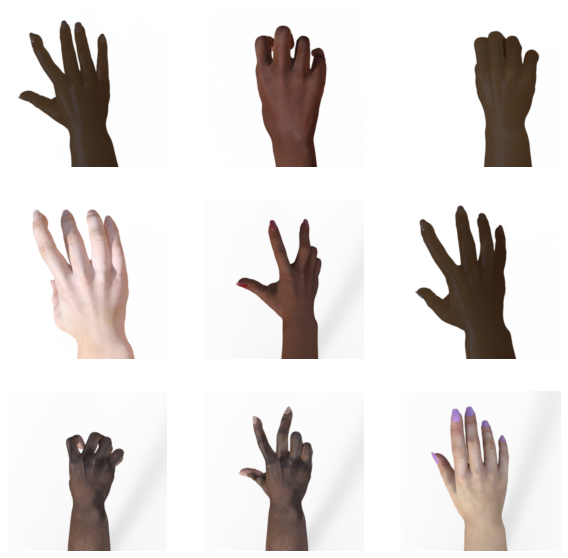

In [9]:
plt.figure(figsize = (10, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = sample_images_train.next()[0]
    plt.imshow(img)
    plt.axis('off')
    
plt.show()

Found 372 images belonging to 3 classes.


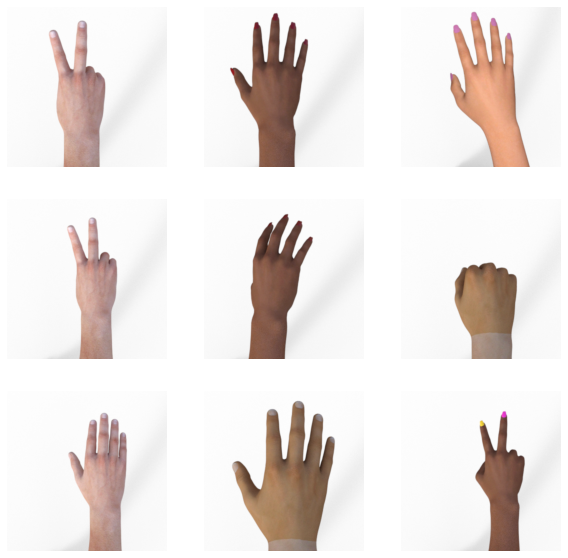

In [10]:
sample_images_test = image_generator.flow_from_directory(
    test_dir,
    target_size=(300, 300),
    color_mode='rgb',
    class_mode=None,
    batch_size=1,
    shuffle=True,
    seed=42
)

plt.figure(figsize = (10, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = sample_images_test.next()[0]
    plt.imshow(img)
    plt.axis('off')


In [30]:
train_images = image_generator.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True,
    seed=42
)
val_images = image_generator.flow_from_directory(
    val_dir,
    target_size=(150,150),
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True,
    seed=42,
)

test_images = image_generator.flow_from_directory(
    test_dir,
    target_size=(150,150),
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False,
    seed=42,
)

Found 2520 images belonging to 3 classes.
Found 33 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


# The Image generator is used without any distortions here to generate Train,Test and Validation Images.

In [31]:
inputs = tf.keras.Input(shape = (150, 150, 3))
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Flatten()(x)
#x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(3, activation = 'softmax')(x)

model = tf.keras.Model(inputs = inputs, outputs = outputs)

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

history = model.fit(
    train_images,
    validation_data = val_images,
    epochs = 40,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor = 'val_loss',
            patience = 5,
            restore_best_weights = True
        )
    ]
)

Epoch 1/40
79/79 [==============================] - 13s 161ms/step - loss: 0.6405 - accuracy: 0.6992 - val_loss: 1.1023 - val_accuracy: 0.7273
Epoch 2/40
79/79 [==============================] - 12s 155ms/step - loss: 0.0522 - accuracy: 0.9845 - val_loss: 0.2449 - val_accuracy: 0.9394
Epoch 3/40
79/79 [==============================] - 12s 157ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1731 - val_accuracy: 0.9091
Epoch 4/40
79/79 [==============================] - 12s 156ms/step - loss: 2.3354e-04 - accuracy: 1.0000 - val_loss: 0.1678 - val_accuracy: 0.9697
Epoch 5/40
79/79 [==============================] - 12s 155ms/step - loss: 1.2635e-04 - accuracy: 1.0000 - val_loss: 0.1678 - val_accuracy: 0.9697
Epoch 6/40
79/79 [==============================] - 12s 156ms/step - loss: 8.1089e-05 - accuracy: 1.0000 - val_loss: 0.1647 - val_accuracy: 0.9091
Epoch 7/40
79/79 [==============================] - 12s 154ms/step - loss: 5.2424e-05 - accuracy: 1.0000 - val_loss: 0.1316 - val_

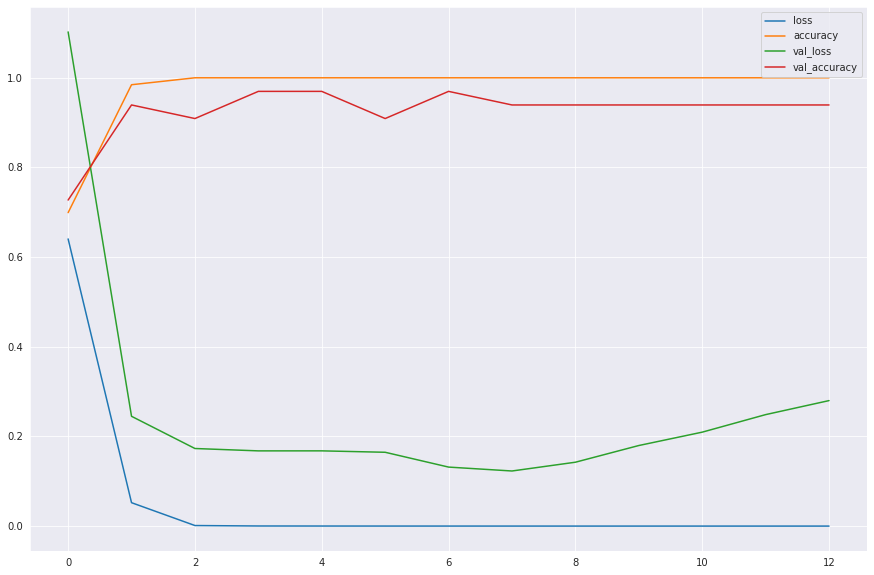

In [32]:
import seaborn as sns
sns.set_style("darkgrid")
pd.DataFrame(model.history.history).plot(figsize=(15,10));

In [33]:
prediction = model.predict(test_images)

In [34]:
prediction = np.argmax(model.predict(test_images), axis = 1)

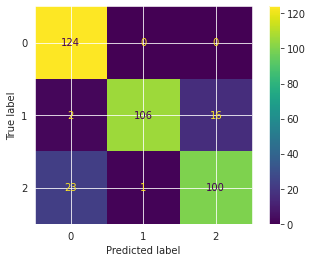

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report,confusion_matrix
import seaborn as sns
ConfusionMatrixDisplay.from_predictions(test_images.labels,prediction);

Accuracy: 88.71%


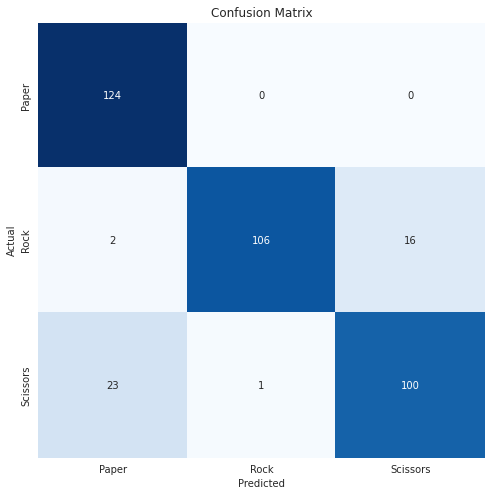

Classification Report:
----------------------
               precision    recall  f1-score   support

       Paper       0.83      1.00      0.91       124
        Rock       0.99      0.85      0.92       124
    Scissors       0.86      0.81      0.83       124

    accuracy                           0.89       372
   macro avg       0.89      0.89      0.89       372
weighted avg       0.89      0.89      0.89       372



In [36]:
acc = model.evaluate(test_images, verbose=0)[1]
print("Accuracy: {:.2f}%".format(acc * 100))

predictions = np.argmax(model.predict(test_images), axis=1)

cm = confusion_matrix(test_images.labels, predictions, labels=[0, 1, 2])
clr = classification_report(test_images.labels, predictions, labels=[0, 1, 2], target_names=["Paper", "Rock", "Scissors"])

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=["Paper", "Rock", "Scissors"])
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=["Paper", "Rock", "Scissors"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

In [18]:
l=[]
for i in range(0,3,1):
  ct=0
  for j in range(0,3,1):
    if i!=j:
      ct = ct+cm[i][j]
  l.append(ct)
     

print(l)  

[8, 15, 13]


In [19]:
df= pd.DataFrame({"Class Name":["Paper", "Rock", "Scissors"] , "misclassification":l})
df

,Class Name,misclassification
0,Paper,8
1,Rock,15
2,Scissors,13


# The Accuracy for the this model is 88%. There seems to be a slight overfit for this model as seen from the plot.

In [37]:
sample_generator = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    vertical_flip = True,
    rotation_range = 90,
    height_shift_range = 0.2,
    width_shift_range = 0.2,
    zoom_range = 0.2
)

In [38]:
train_images = sample_generator.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=10,
    shuffle=True,
    seed=42
)
val_images = sample_generator.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=10,
    shuffle=True,
    seed=42,
)

test_images = sample_generator.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=10,
    shuffle=False,
    seed=42,
)

Found 2520 images belonging to 3 classes.
Found 33 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [41]:
inputs = tf.keras.Input(shape = (150, 150, 3))
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Flatten()(x)
# = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(3, activation = 'softmax')(x)

model = tf.keras.Model(inputs = inputs, outputs = outputs)

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

history = model.fit(
    train_images,
    validation_data = val_images,
    epochs = 40,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor = 'val_loss',
            patience = 5,
            restore_best_weights = True
        )
    ]
)

Epoch 1/40
252/252 [==============================] - 33s 131ms/step - loss: 1.0986 - accuracy: 0.3409 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 2/40
252/252 [==============================] - 26s 104ms/step - loss: 1.0716 - accuracy: 0.4052 - val_loss: 0.9510 - val_accuracy: 0.5758
Epoch 3/40
252/252 [==============================] - 26s 103ms/step - loss: 0.9504 - accuracy: 0.5254 - val_loss: 1.5679 - val_accuracy: 0.3636
Epoch 4/40
252/252 [==============================] - 27s 107ms/step - loss: 0.7281 - accuracy: 0.6790 - val_loss: 0.8689 - val_accuracy: 0.5455
Epoch 5/40
252/252 [==============================] - 26s 102ms/step - loss: 0.5218 - accuracy: 0.7881 - val_loss: 0.8435 - val_accuracy: 0.6364
Epoch 6/40
252/252 [==============================] - 26s 102ms/step - loss: 0.4272 - accuracy: 0.8353 - val_loss: 0.5410 - val_accuracy: 0.7879
Epoch 7/40
252/252 [==============================] - 26s 103ms/step - loss: 0.3047 - accuracy: 0.8913 - val_loss: 0.9141 - val_ac

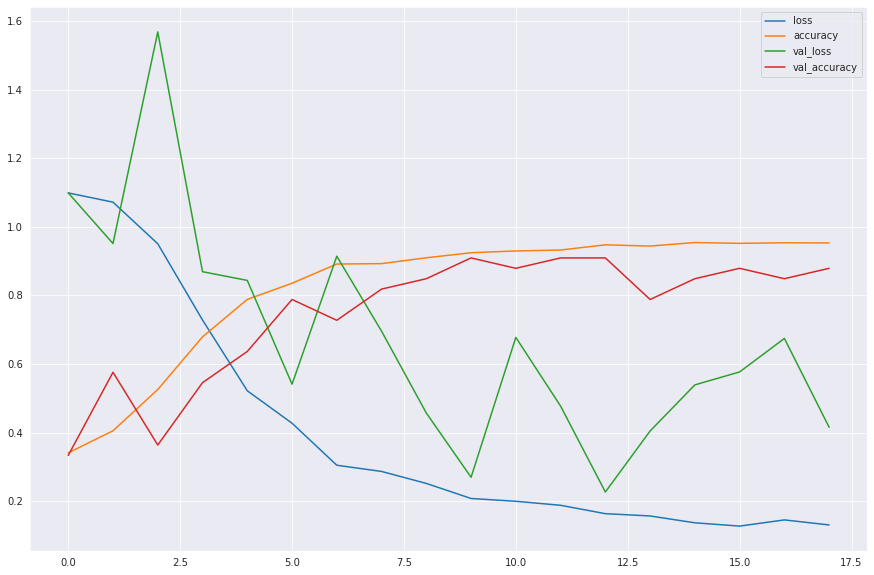

In [42]:
import seaborn as sns
sns.set_style("darkgrid")
pd.DataFrame(model.history.history).plot(figsize=(15,10));

Accuracy: 91.13%


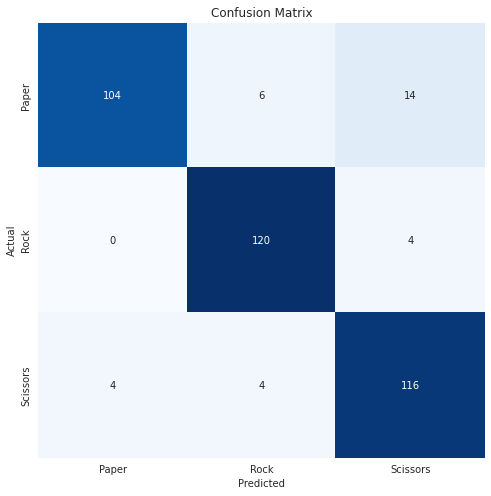

Classification Report:
----------------------
               precision    recall  f1-score   support

       Paper       0.96      0.84      0.90       124
        Rock       0.92      0.97      0.94       124
    Scissors       0.87      0.94      0.90       124

    accuracy                           0.91       372
   macro avg       0.92      0.91      0.91       372
weighted avg       0.92      0.91      0.91       372



In [43]:
acc = model.evaluate(test_images, verbose=0)[1]
print("Accuracy: {:.2f}%".format(acc * 100))

predictions = np.argmax(model.predict(test_images), axis=1)

cm = confusion_matrix(test_images.labels, predictions, labels=[0, 1, 2])
clr = classification_report(test_images.labels, predictions, labels=[0, 1, 2], target_names=["Paper", "Rock", "Scissors"])

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=["Paper", "Rock", "Scissors"])
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=["Paper", "Rock", "Scissors"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

In [44]:
l=[]
for i in range(0,3,1):
  ct=0
  for j in range(0,3,1):
    if i!=j:
      ct = ct+cm[i][j]
  l.append(ct)
     

print(l)  

[20, 4, 8]


In [45]:
df1= pd.DataFrame({"Class Name":["Paper", "Rock", "Scissors"] , "misclassification":l})
df1

,Class Name,misclassification
0,Paper,20
1,Rock,4
2,Scissors,8


# This Model has an accuracy of little more than 91% with a slight increase from the previous model. This can be attributed to the fact that the image distortions provided in the generator has given better exposure to the model for various training cases resulting in better accuracy in predicting.

# In this model overfitting has overall decreased around 10 epochs but increased after that. 

# Conclusion:- The model performs better when Image Augmentation is used as more distortion to images results in better training sets and classification gains more accuracy.